# Data assessment, Bar & Boxplot Graphs using Pandas

**Degree**: Data Science | **Class**: 815 | **Institution**: Let's Code | **Module**: V - Programming Techniques II 

#### 👨‍🏫 Professor
[Gabriela Uhrigshardt](https://github.com/gabrielagu)

#### Student:
👩‍🎓: [Ana Gabriela de Castro Almeida](https://github.com/almeidacastrogabriela)

### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

# 🇬🇧 **Note**:

As the file has questions and information in Brazilian Portguese, code was developed and comments were added to make it clear for non-portuguese speakers.

The core of this exercise consisted in working with two different databases that had the variables listed above.

In [1]:
#Importando as bibliotecas necessárias

#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leitura da base de dados que será analisada e transformação em dataframe

# Reading the file that contains the data to be assessed and transforming it into a dataframe

df2 = pd.read_csv("dados_covid_sp_20.csv")

In [3]:
# Verificando o nome das colunas e demais visualização do dataframe

# Checking dataframe's columns and other visual attributes

df2.head()

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos,casos_novos,obitos,obitos_novos
0,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-02,0,0,0,0
1,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-03,0,0,0,0
2,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-04,28,5,0,0
3,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-05,717,34,27,2
4,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-06,163,3,10,1


## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

In [4]:
# Filtrando o dataframe para pegar os DRS que são diferentes de Grande São Paulo

# Filtering the dataframe to collect all DRS that are not named Great São Paulo

df2_without_gsp = df2[df2["nome_drs"] != "Grande São Paulo"]

<AxesSubplot:title={'center':'Total Covid-19 Deaths by Regional Health Dept'}, xlabel='Regional Health Dept.', ylabel='Deaths'>

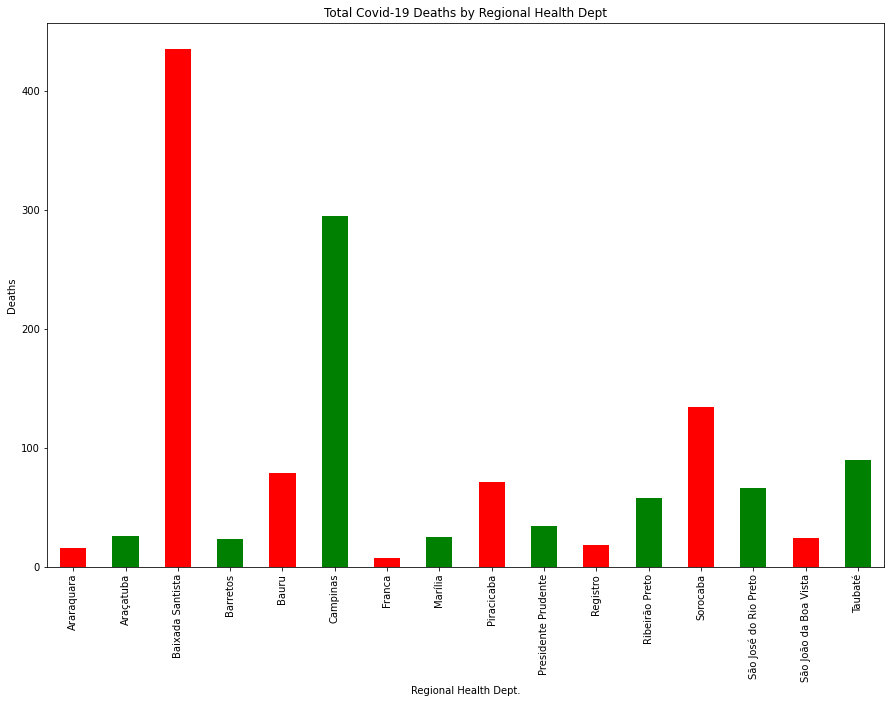

In [7]:
# Agrupando os Departamentos Regionais e Novos Óbitos para verificar o total de óbitos em todos os meses de 2020

df2_without_gsp.groupby(["nome_drs"])["obitos_novos"].sum().plot(kind="bar", 
                                                                 title="Total Covid-19 Deaths by Regional Health Dept", 
                                                                 figsize=(15,10), xlabel="Regional Health Dept.", 
                                                                 ylabel="Deaths", color=["red", "green"])

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

In [11]:
# Criação de uma cópia do dataframe original para fazer o pivo.

#Creating a copy of the original dataframe in order to pivot it.

df2_copy = df2.copy()

🇧🇷
**Observação**: Fazendo um pivo com os dados dos DRS selecionados e medindo o total de óbitos para essas regiões.
Como o dataframe é pequeno, podemos ver que o índice para o mês de "Abril" é 2, já o mês de "Junho" é a última posição do dataframe.

A solicitação pede uma análise somente do mês de Abril

-----------------------------
🇬🇧
**Note**: Creating a pivot with data of the selected DRS, measuring total deaths for those cities.

The question requested an analysis of April.

In [31]:
# Selecionando três cidades do dataframe para visualizar o total de óbitos do mês de Abril de 2020

# Choosing 3 cities of the dataframe to check the total death during April 2020

chosen_cities = df2_copy.pivot_table(index="ano_mes", columns="nome_drs", values="obitos_novos", aggfunc="sum") 

chosen_cities = chosen_cities[["Baixada Santista", "Sorocaba", "Bauru"]]

chosen_cities = chosen_cities.reset_index()

chosen_cities = chosen_cities[chosen_cities["ano_mes"] == "2020-04"]

In [32]:
chosen_cities.head()

nome_drs,ano_mes,Baixada Santista,Sorocaba,Bauru
2,2020-04,86,31,26


<AxesSubplot:title={'center':'Total Covid-19 Deaths during April 2020'}, ylabel='Regional Health Dept.'>

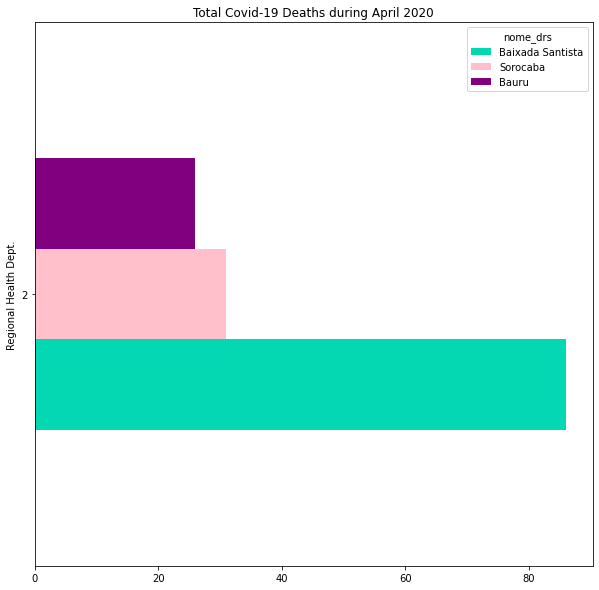

In [40]:
# Criação do gráfico de barras horizontais para observar as informações coletadas no pivo para as cidades

# Creating a horizontal bar graph to observe the information collected through the pivot for the selected cities

chosen_cities.plot(kind="barh", figsize=(10,10), color={"#800080", "#04D8B2", "#FFC0CB"},
                   title="Total Covid-19 Deaths during April 2020", ylabel="Number of Deaths",
                   xlabel="Regional Health Dept.")

---------------------
---------------------

In [41]:
# Leitura da base de dados que será analisada e transformação em dataframe

# Reading the file that contains the data to be assessed and transforming it into a dataframe

df1 = pd.read_csv("IBM_Employees.csv")

## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

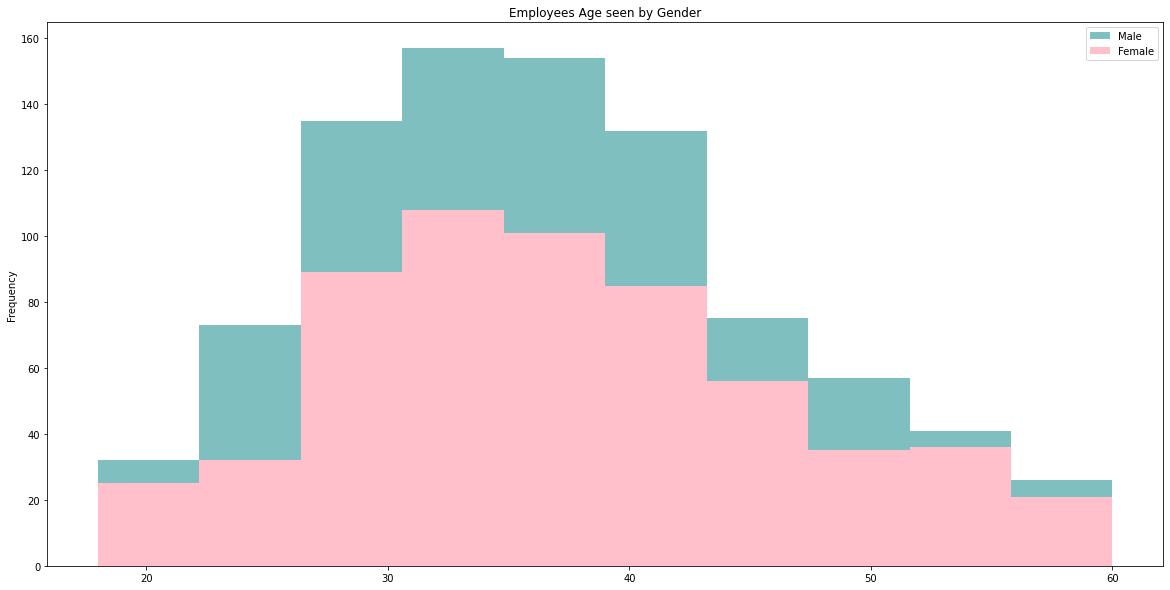

In [64]:
# Criando um histograma para idades separadas por gênero

# Creating a histogram with the ages of employees separated by gender


ax1 = df1[df1["Gender"]=="Male"].plot(kind="hist", figsize=(20,10), y="Age", color="teal", alpha=0.5, label="Male", 
                                      title=("Employees Age seen by Gender"))
ax2 = df1[df1["Gender"]=="Female"].plot(kind="hist", y="Age", color="#FFC0CB", label="Female", ax=ax1)

**b)** Faça agora um boxplot das idades, por gênero.

<AxesSubplot:title={'center':'Age'}, xlabel='Gender'>

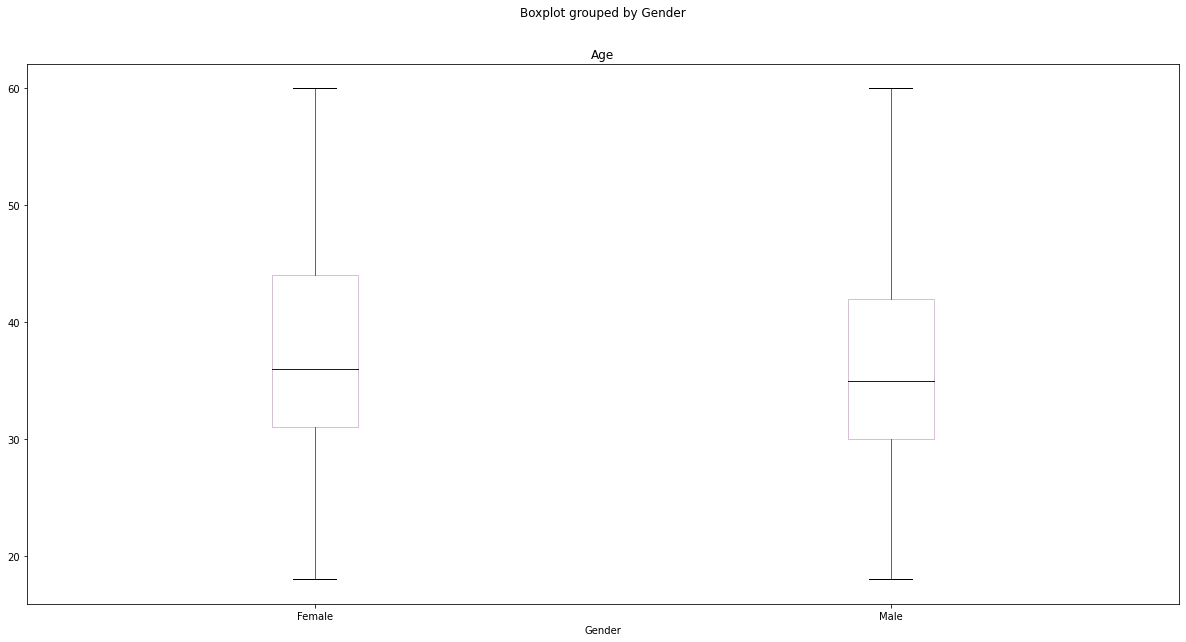

In [70]:
# Criando um boxplot para idades separadas por gênero

# Creating a boxplot with the ages of employees separated by gender

df1.boxplot(column=["Age"], by="Gender", grid=False, color={"boxes":"thistle", "medians" : "blue"}, 
            figsize=(20,10), showfliers=False)